In [1]:

%matplotlib inline

import matplotlib
import pandas as pd
import numpy as np

import datetime 

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 

In [2]:
raw_fledge_df = pd.read_csv("Adelie Penguin Fledgling Weights.csv", engine='python')

In [3]:
raw_fledge_df.columns


Index(['studyName', 'Date GMT', 'Island', 'Colony', 'Band Number',
       'Weight (g)'],
      dtype='object')

In [4]:
print(len(raw_fledge_df))

6339


In [4]:
fledge_df = raw_fledge_df.copy()
fledge_df.reset_index()

# Analyze how many rows are missing a valid band number
print("Number entries with NaN for Band Number: ", len(fledge_df[fledge_df['Band Number'].isnull()]))
print("Number entries with 0 for Band Number: ", len(fledge_df[fledge_df['Band Number'] == 0.0]))

# Analyze how many rows are missing a valid Weight
print("Number entries with NaN for Weight: ", len(fledge_df[fledge_df['Weight (g)'].isnull()]))
print("Number entries with 0 for Weight: ", len(fledge_df[fledge_df['Weight (g)'] == 0.0]))
# strip rows with 0 for weight
fledge_df = fledge_df[fledge_df['Weight (g)'] != 0.0]
print("stripped rows: ", len(raw_fledge_df) - len(fledge_df))

# # strip rows with 0.0 and null band number, to get number of unique band numbers
# f_df1 = fledge_df.copy()
# f_df1 = f_df1[~f_df1['Band Number'].isnull()]
# f_df1 = f_df1[f_df1['Band Number'] != 0]
# print(
#     f"Post processing, removed {len(fledge_df) - len(f_df1)} number of rows, "
#     f"new total number of entries: {len(f_df1)}"
#      )
# print("Number of unique band number entries: ", len(f_df1['Band Number'].unique()))

Number entries with NaN for Band Number:  174
Number entries with 0 for Band Number:  3553
Number entries with NaN for Weight:  0
Number entries with 0 for Weight:  3
stripped rows:  3


In [5]:
# Processing column
fledge_df['Date'] = pd.to_datetime(fledge_df['Date GMT'])
fledge_df['Weight (kg)'] = fledge_df['Weight (g)'].apply(lambda x: x/1000.0)

In [6]:
fledge_df.describe()

,Band Number,Weight (g),Weight (kg)
count,6162.000000,6336.000000,6336.000000
mean,3846.165693,3064.651989,3.064652
std,5049.956557,357.039028,0.357039
min,0.000000,1350.000000,1.350000
25%,0.000000,2850.000000,2.850000
50%,0.000000,3050.000000,3.050000
75%,7998.750000,3300.000000,3.300000
max,19499.000000,4800.000000,4.800000


<AxesSubplot:title={'center':'Number of measurements per Year'}, xlabel='Date'>

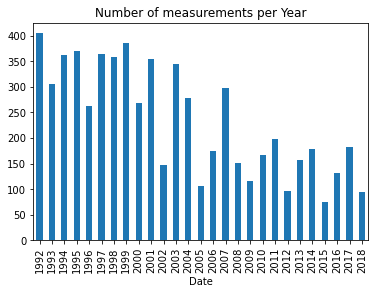

In [7]:
counts_per_year = fledge_df.groupby(fledge_df['Date'].dt.year)['Date'].count()
plt.title("Number of measurements per Year")
counts_per_year.plot(kind='bar')

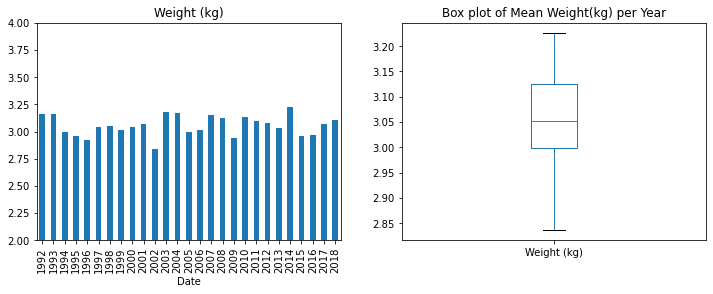

In [8]:
mean_weight_per_year = fledge_df.groupby(fledge_df['Date'].dt.year)['Weight (kg)'].mean()

fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(12,4))

mean_weight_per_year.plot(ylim=(2,4), kind='bar', ax=axes[0], subplots=True)
plt.title("Mean Fledging Weight(kg) per Year")
mean_weight_per_year.plot(kind='box', ax=axes[1], subplots=True)
plt.title("Box plot of Mean Weight(kg) per Year")

plt.show()

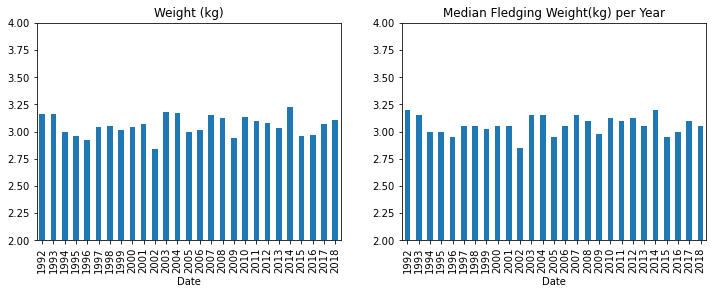

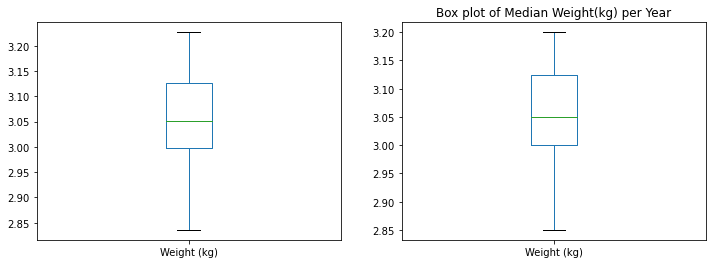

In [9]:
mean_weight_per_year = fledge_df.groupby(fledge_df['Date'].dt.year)['Weight (kg)'].mean()
median_weight_per_year = fledge_df.groupby(fledge_df['Date'].dt.year)['Weight (kg)'].median()

fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(12,4))

mean_weight_per_year.plot(ylim=(2,4), kind='bar', ax=axes[0], subplots=True)
plt.title("Mean Fledging Weight(kg) per Year")
median_weight_per_year.plot(ylim=(2,4), kind='bar', ax=axes[1], subplots=True)
plt.title("Median Fledging Weight(kg) per Year")

plt.show()


fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(12,4))

mean_weight_per_year.plot(kind='box', ax=axes[0], subplots=True)
plt.title("Box plot of Mean Weight(kg) per Year")

median_weight_per_year.plot(kind='box', ax=axes[1], subplots=True)
plt.title("Box plot of Median Weight(kg) per Year")

plt.show()

<AxesSubplot:title={'center':'Weight (kg)'}, xlabel='Year'>

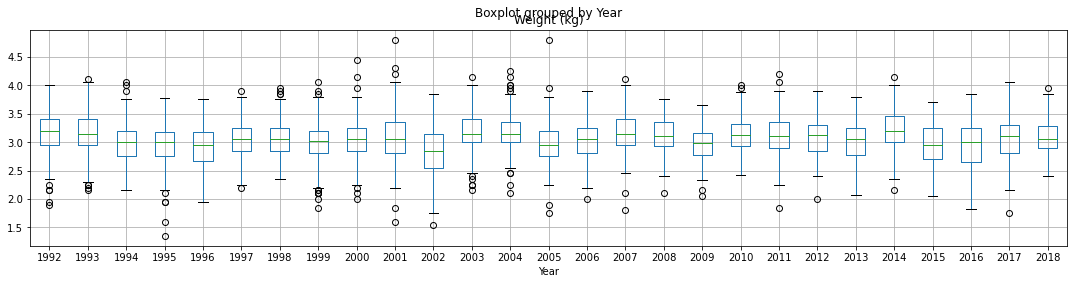

In [10]:
temp = fledge_df.copy()
temp["Year"] = temp['Date'].dt.year
temp.boxplot("Weight (kg)", by="Year", figsize=(18, 4))

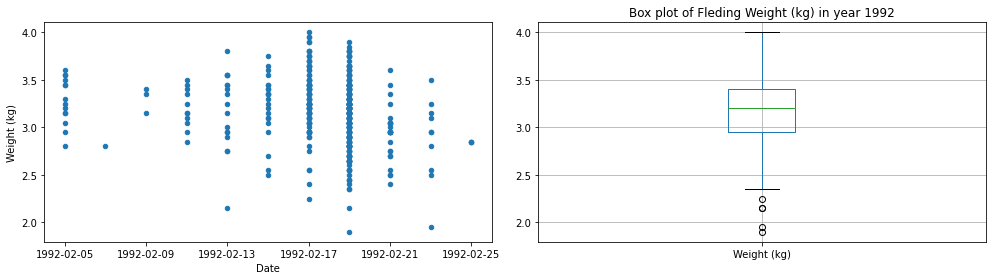

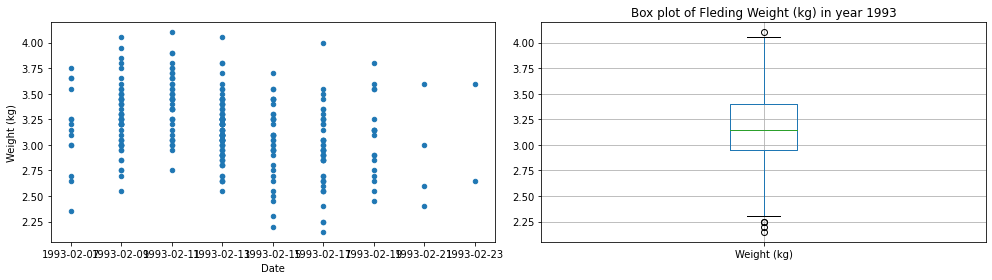

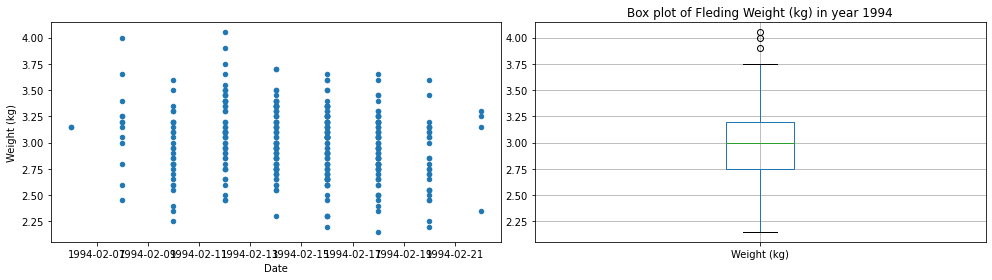

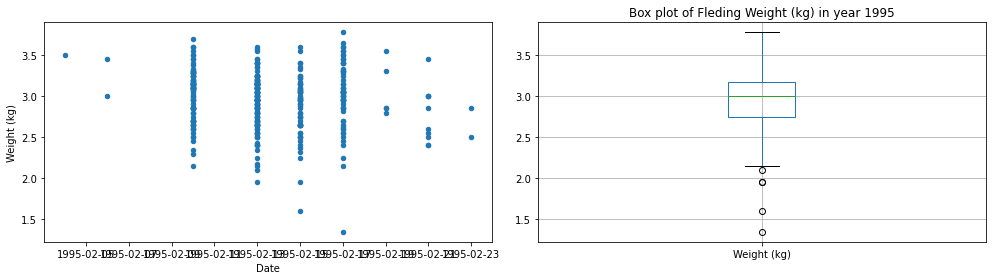

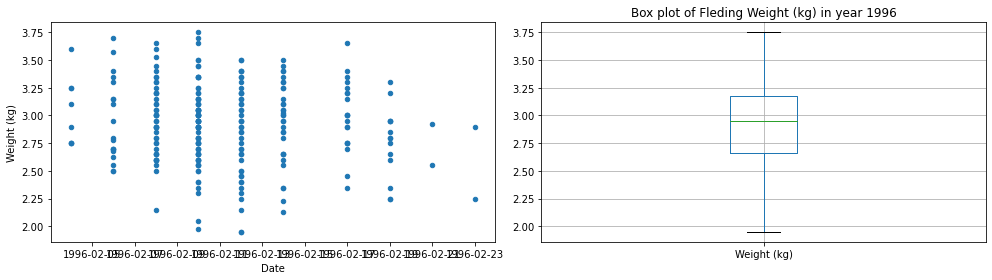

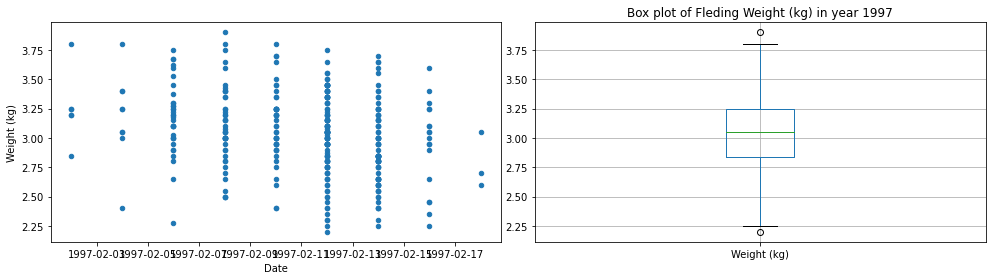

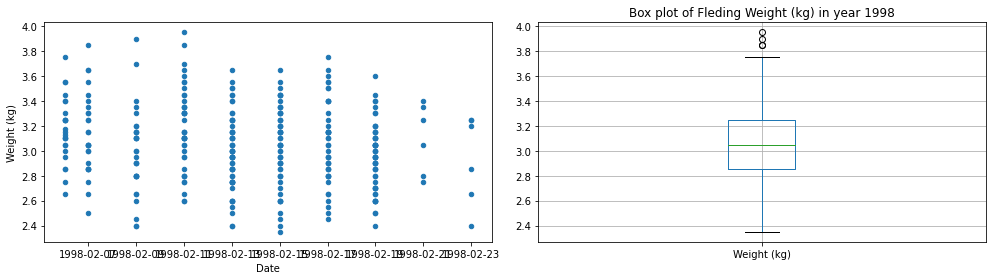

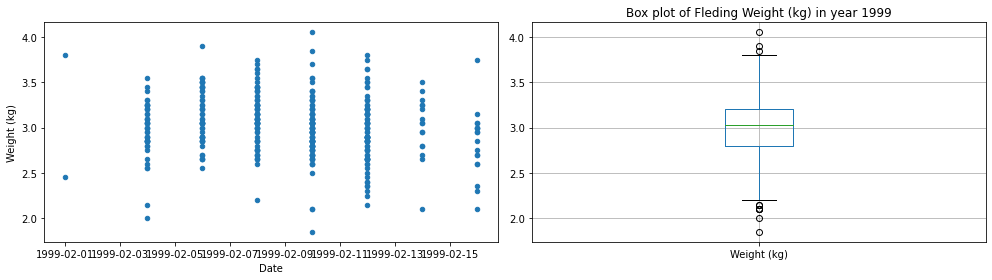

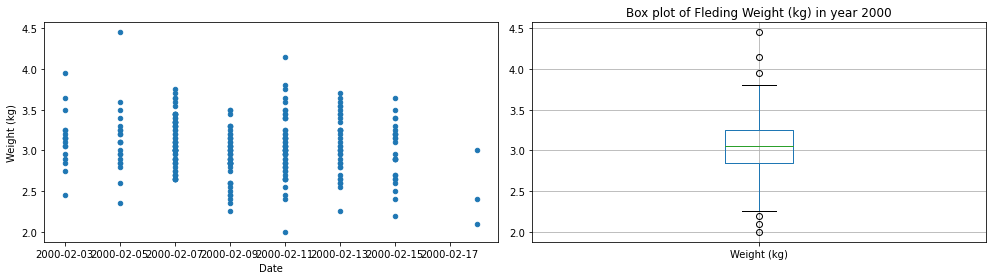

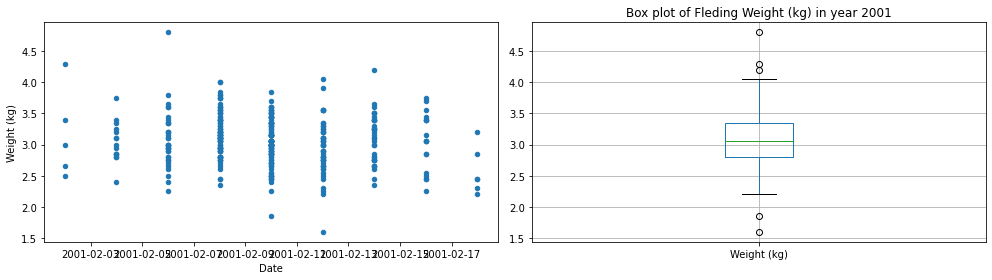

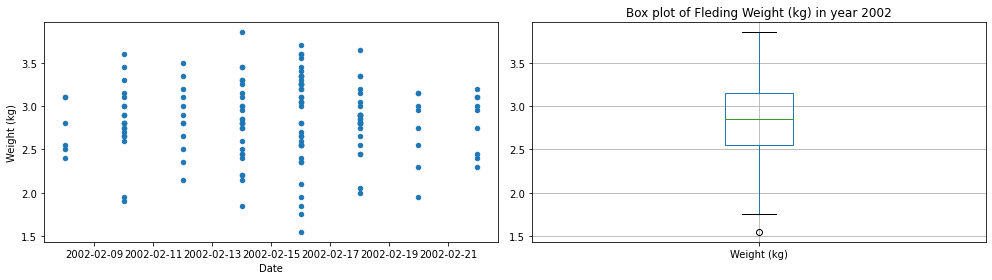

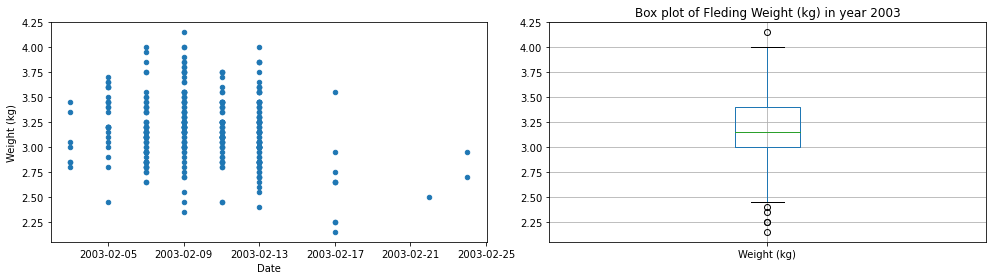

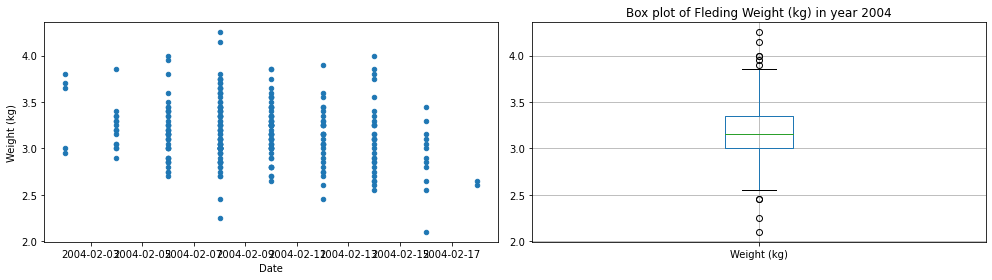

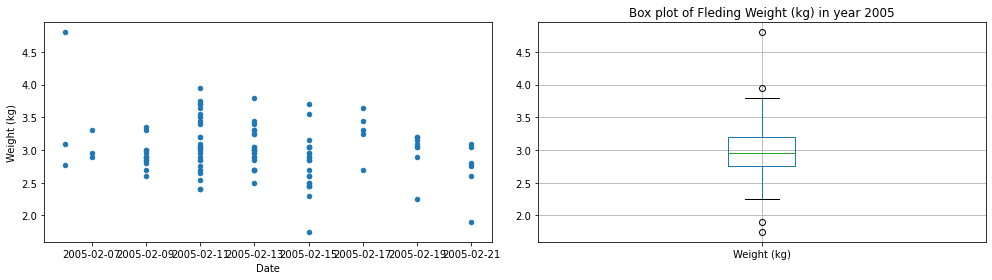

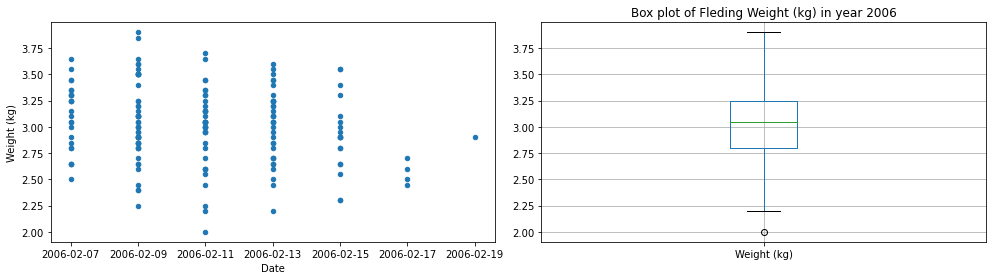

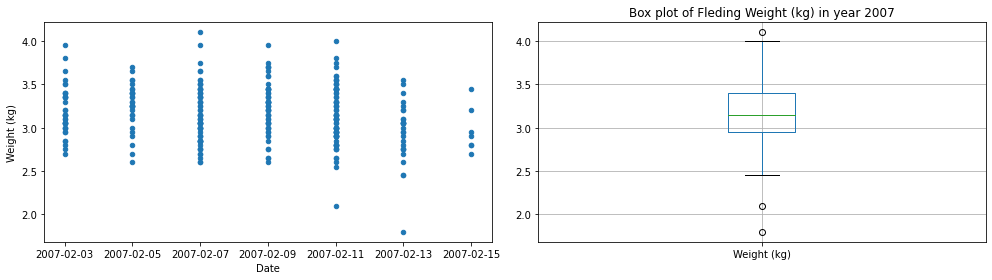

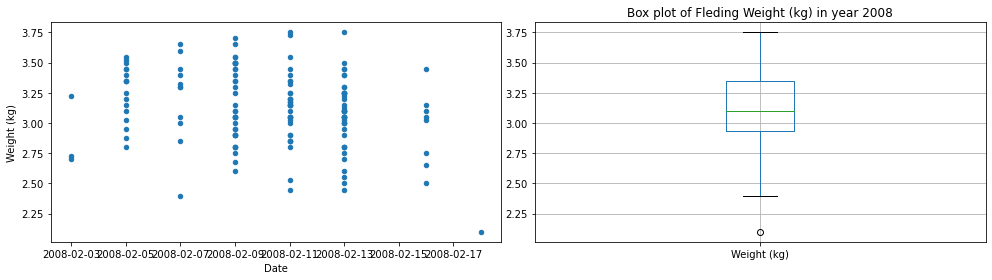

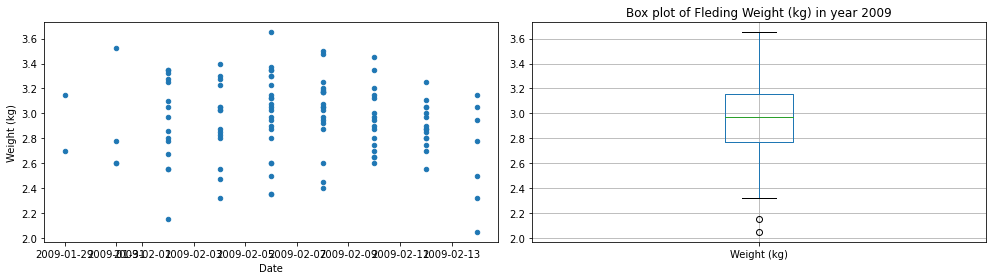

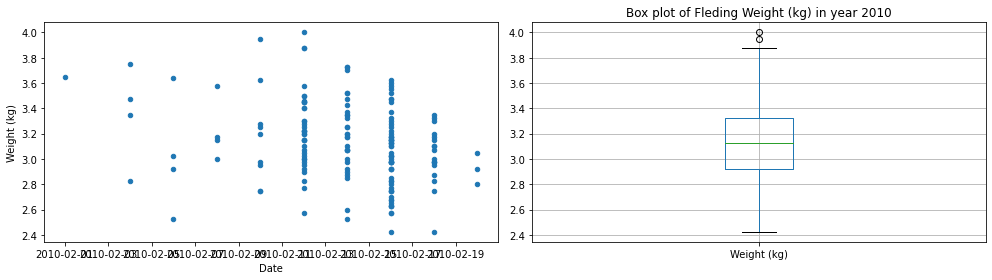

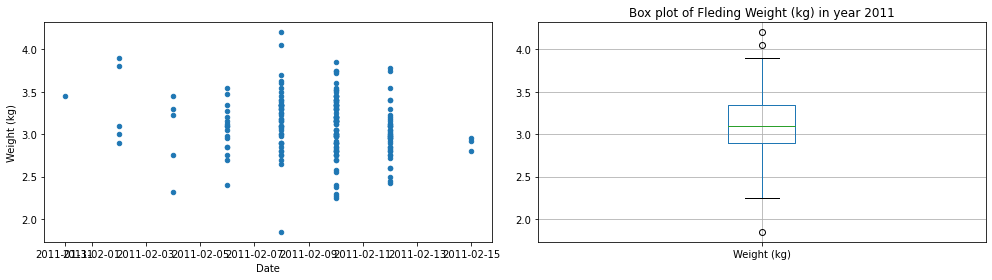

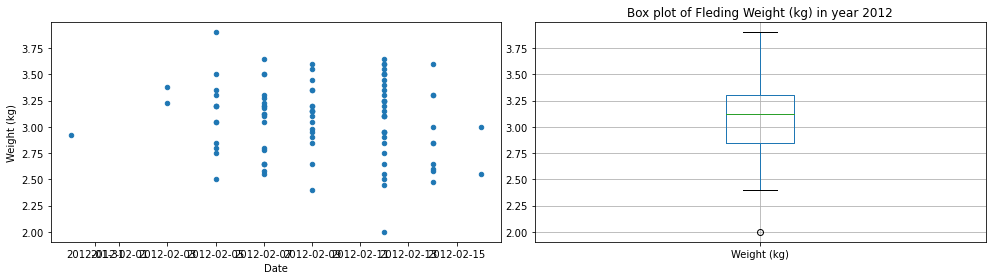

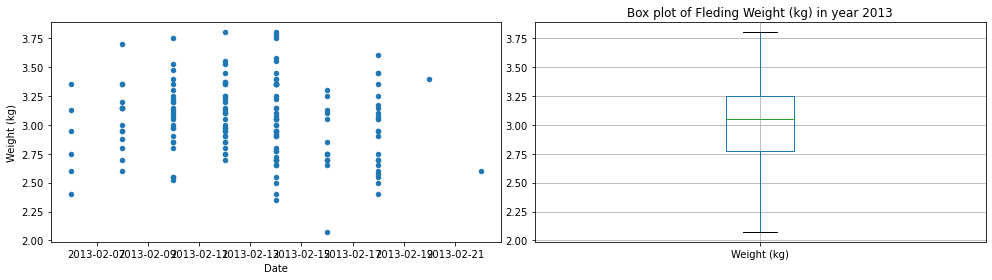

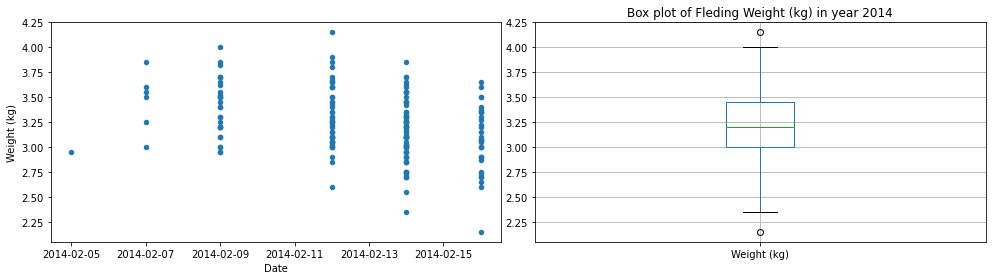

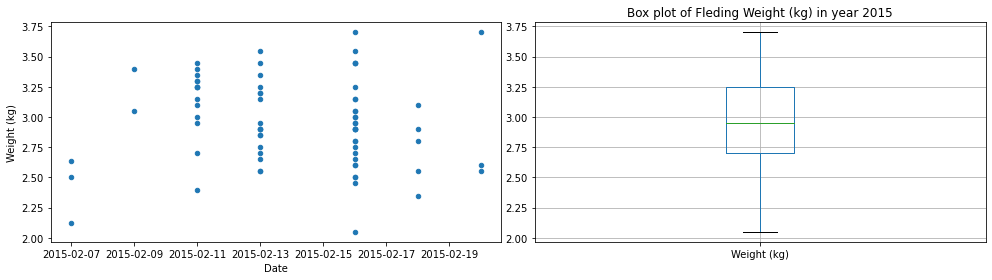

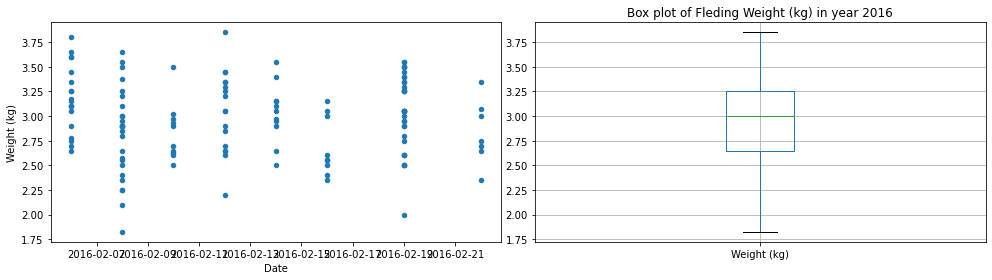

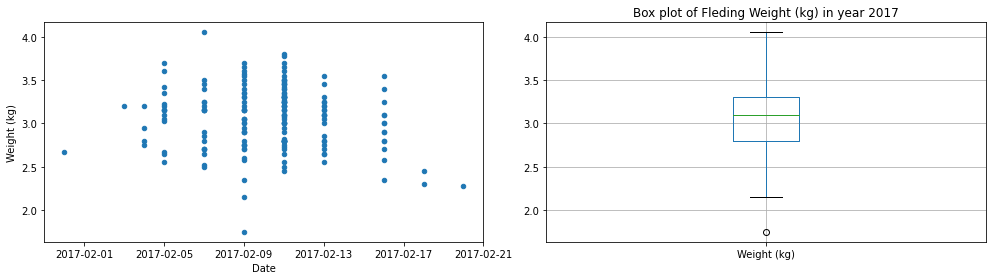

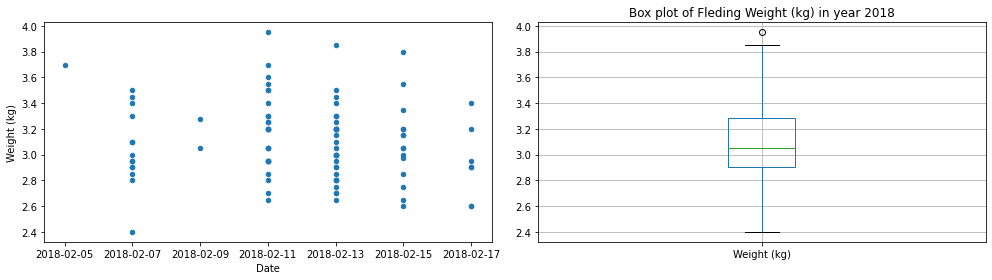

In [11]:
for year in range(1992, 2019):
    fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(14,4))

    temp = fledge_df[fledge_df['Date'].dt.year == year]
    temp.plot.scatter(x='Date', y='Weight (kg)', ax=axes[0], subplots=True)
    plt.title(f"Fledging Weight(kg) in year {year}")
#     plt.xticks(rotation=45)
    plt.tight_layout()

    temp.boxplot(column=["Weight (kg)"], ax=axes[1])
    plt.title(f"Box plot of Fleding Weight (kg) in year {year}")

    plt.show()

----

In [12]:
raw_cc_df = pd.read_csv("Adelie Penguin Chick Counts.csv", engine='python')

In [13]:
raw_cc_df.columns

Index(['studyName', 'Date GMT', 'Time GMT', 'Island', 'Colony', 'Adults',
       'Chicks'],
      dtype='object')

In [188]:
print(len(raw_cc_df))

1467


In [14]:
cc_df = raw_cc_df.copy()
# Analyze how many rows are nan or 0
print("Number entries with NaN for Island: ", len(cc_df[cc_df['Island'].isnull()]))
print("Number entries with 0 for Island: ", len(cc_df[cc_df['Island'] == 0.0]))

print("Number entries with NaN for Colony: ", len(cc_df[cc_df['Colony'].isnull()]))
print("Number entries with 0 for Colony: ", len(cc_df[cc_df['Colony'] == 0.0]))

print("Number entries with NaN for Adults: ", len(cc_df[cc_df['Adults'].isnull()]))
print("Number entries with 0 for Adults: ", len(cc_df[cc_df['Adults'] == 0.0]))
# # strip rows with 0
# cc_df = cc_df[cc_df['Adults'] != 0.0]

print("Number entries with NaN for Chicks: ", len(cc_df[cc_df['Chicks'].isnull()]))
print("Number entries with 0 for Chicks: ", len(cc_df[cc_df['Chicks'] == 0.0]))
# # strip rows with 0
# cc_df = cc_df[cc_df['Chicks'] != 0.0]

# print("stripped rows: ", len(raw_cc_df) - len(cc_df))


Number entries with NaN for Island:  0
Number entries with 0 for Island:  0
Number entries with NaN for Colony:  0
Number entries with 0 for Colony:  0
Number entries with NaN for Adults:  0
Number entries with 0 for Adults:  662
Number entries with NaN for Chicks:  0
Number entries with 0 for Chicks:  665


In [15]:
# Processing column
# adults are actually adult pairs
cc_df['Adult Pairs'] = cc_df['Adults']
cc_df['Adults'] = cc_df['Adult Pairs'] * 2

cc_df['Total Population'] = cc_df['Adults'] + cc_df['Chicks']
cc_df['Date'] = pd.to_datetime(cc_df['Date GMT'])
cc_df['Island'] = cc_df['Island'].str.rstrip()
cc_df['Island'] = cc_df['Island'].str.lstrip()


In [16]:
cc_df.describe()

,Time GMT,Colony,Adults,Chicks,Adult Pairs,Total Population
count,820.000000,1467.000000,1467.000000,1467.000000,1467.000000,1467.000000
mean,1310.664634,7.211179,68.817996,55.163599,34.408998,123.981595
std,228.581555,6.329929,113.186232,100.551219,56.593116,204.352490
min,800.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1100.000000,3.000000,0.000000,0.000000,0.000000,0.000000
50%,1300.000000,5.000000,16.000000,6.000000,8.000000,28.000000
75%,1500.000000,9.100000,88.000000,62.500000,44.000000,155.000000
max,2000.000000,23.100000,772.000000,713.000000,386.000000,1175.000000


----

In [17]:
total_counts_per_year_per_island = cc_df.groupby(
    [cc_df['Date'].dt.year, cc_df['Island']]
).agg({'Colony':'count', 'Adults': 'sum', 'Chicks': 'sum', 'Total Population': 'sum'})

# Total adults and chicks per year for all islands
# Adults and chicks per year for each island
# Adults and chicks for each island per year
# pie chart of total population per island per year

# Total adults to chick ratio per year for all islands
# Adults to chick ratio per year for each island

total_counts_per_year_per_island = total_counts_per_year_per_island.reset_index()
total_counts_per_year_per_island



,Date,Island,Colony,Adults,Chicks,Total Population
0,1992,CHR,13,2324,1684,4008
1,1992,COR,7,1550,875,2425
2,1992,HUM,9,1166,1479,2645
3,1992,LIT,9,532,542,1074
4,1992,TOR,14,3016,2493,5509
...,...,...,...,...,...,...
130,2018,CHR,13,44,26,70
131,2018,COR,7,72,22,94
132,2018,HUM,9,118,73,191
133,2018,LIT,9,0,0,0


In [18]:
total_counts_per_year_per_island.columns

Index(['Date', 'Island', 'Colony', 'Adults', 'Chicks', 'Total Population'], dtype='object')

In [19]:
total_counts_per_year = cc_df.groupby(
    cc_df['Date'].dt.year
).agg(
    {'Colony':'count', 'Adults': 'sum', 'Chicks': 'sum', 'Total Population': 'sum'}
)

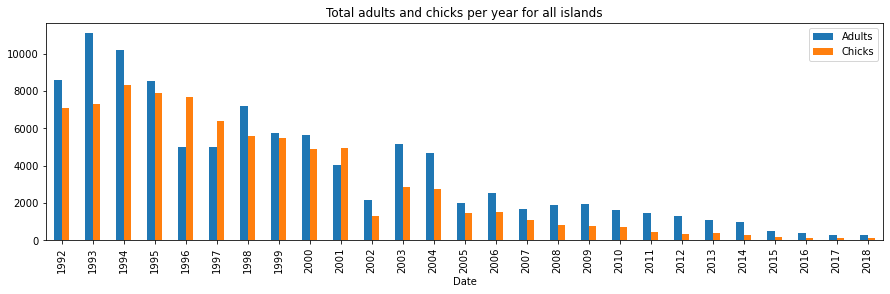

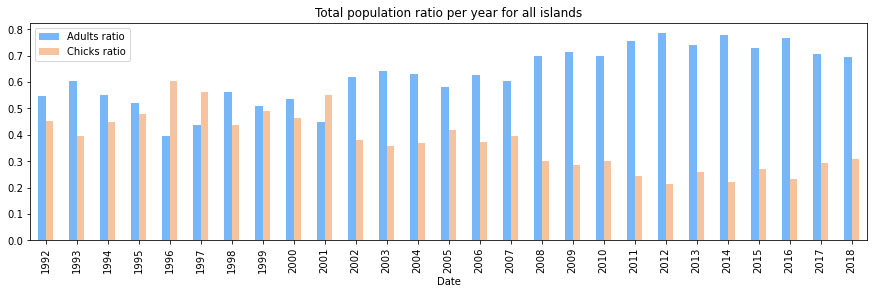

In [20]:
# Total adults and chicks per year for all islands
total_counts_per_year[['Adults', 'Chicks']].plot.bar(figsize=(15,4))
plt.title("Total adults and chicks per year for all islands")
plt.show()

# Total adults to chick ratio per year for all islands
total_counts_per_year[['Adults', 'Chicks']].div(total_counts_per_year['Total Population'], axis=0).plot.bar(
    color={'Adults': '#77b7f7', 'Chicks': '#f5c49f'},
    figsize=(15, 4)
)
plt.title('Total population ratio per year for all islands')
plt.legend(["Adults ratio", "Chicks ratio"])
plt.show()

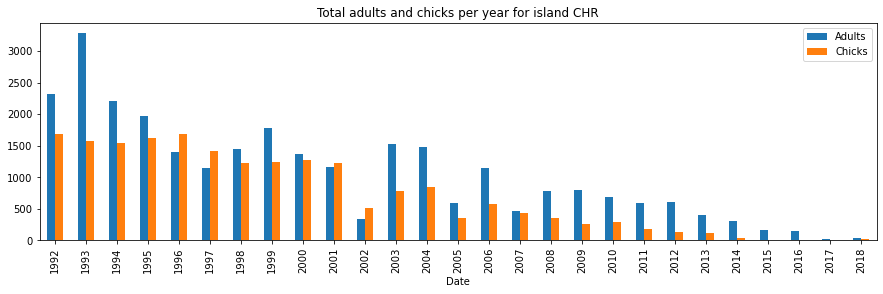

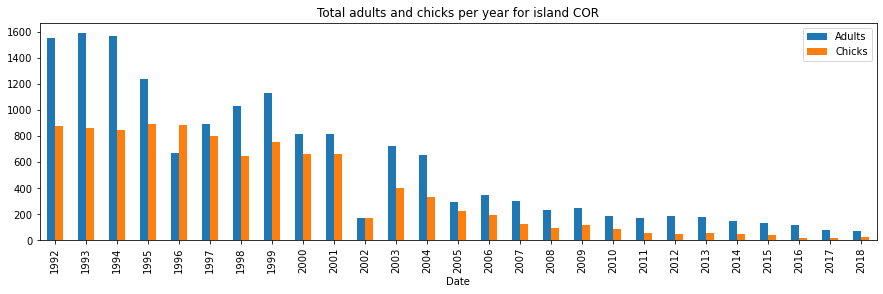

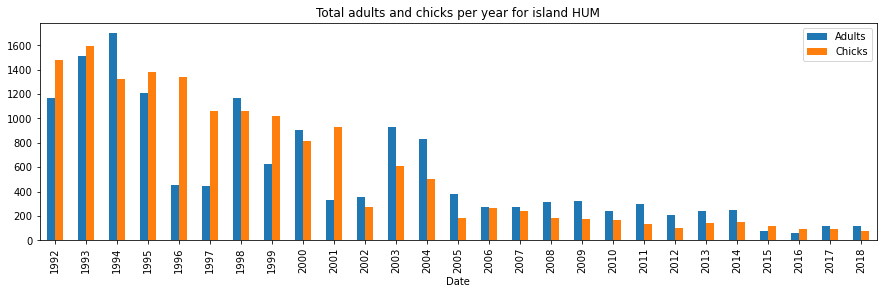

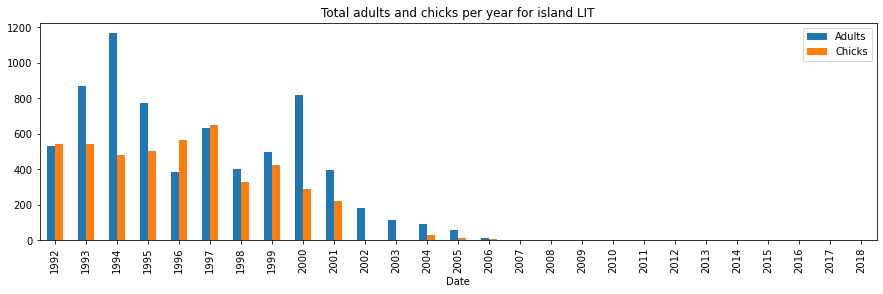

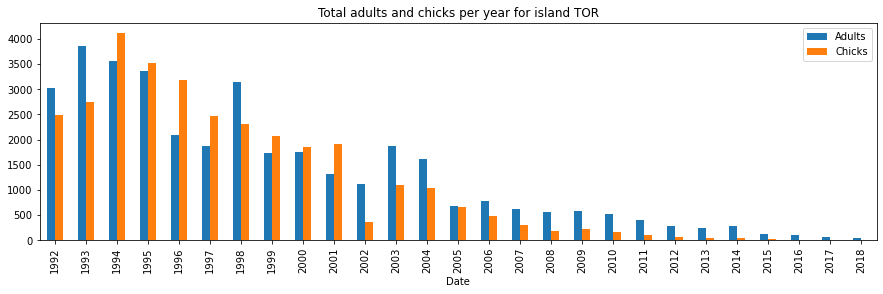

In [21]:
# Adults and chicks per year for each island
for island in cc_df['Island'].unique():
    counts_per_year = total_counts_per_year_per_island[total_counts_per_year_per_island['Island'] == island]
    counts_per_year = counts_per_year.set_index('Date')
    counts_per_year[['Adults', 'Chicks']].plot.bar(figsize=(15,4))
    plt.title(f'Total adults and chicks per year for island {island}')
    

/Users/jazlynli/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


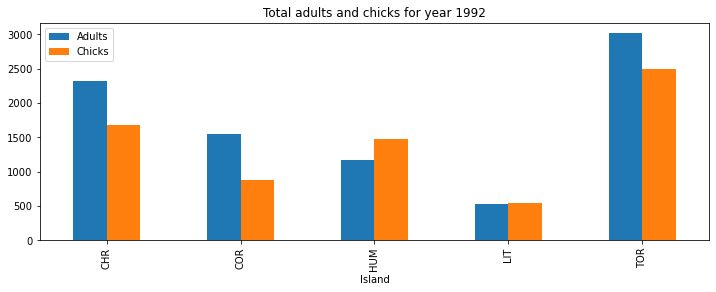

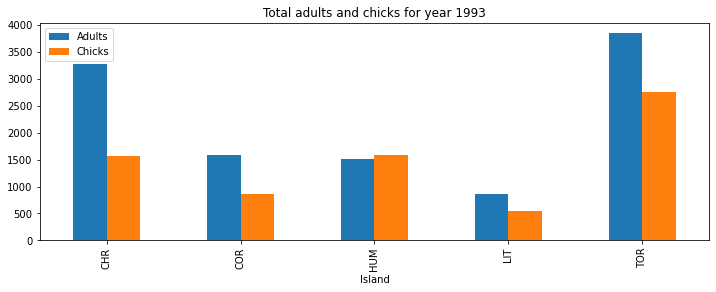

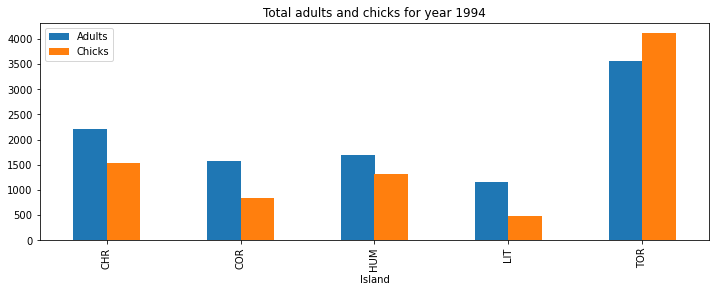

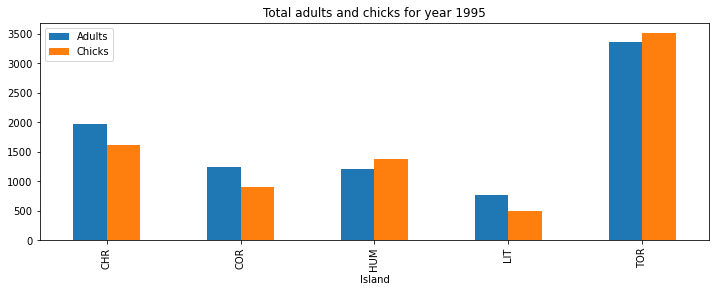

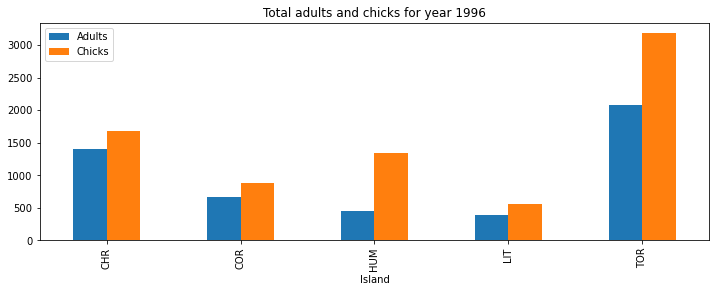

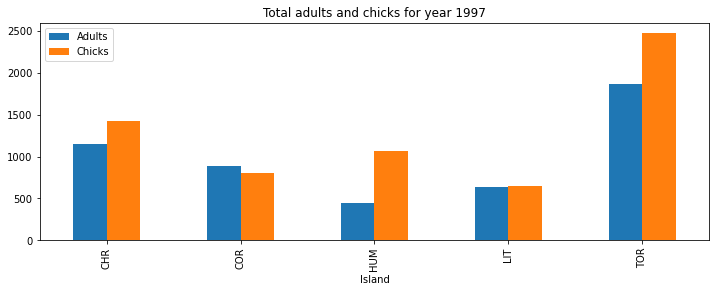

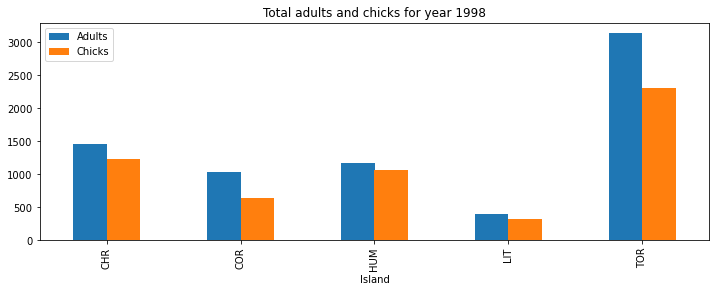

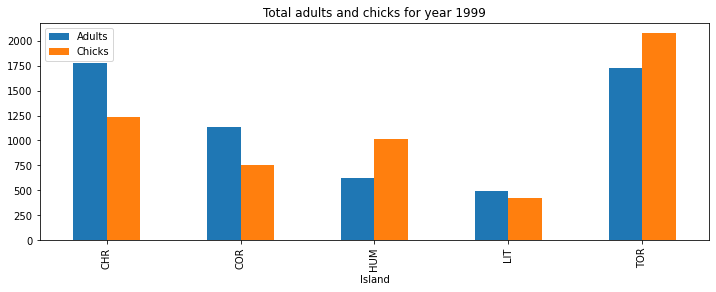

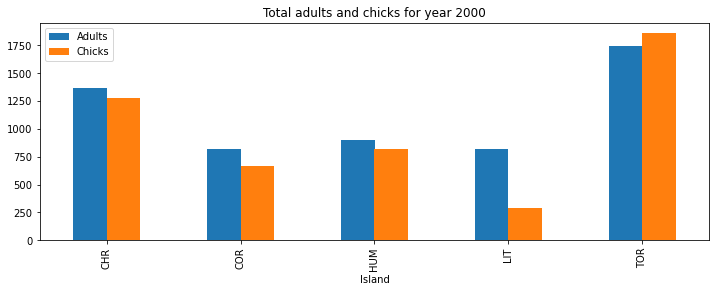

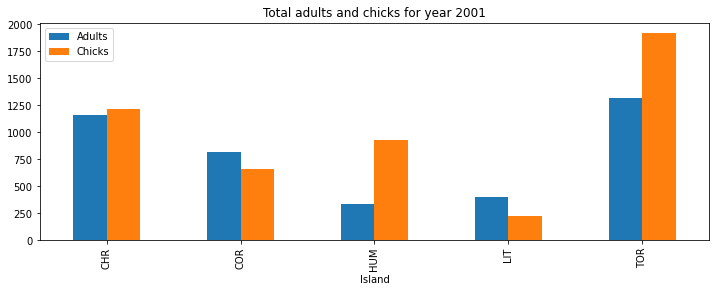

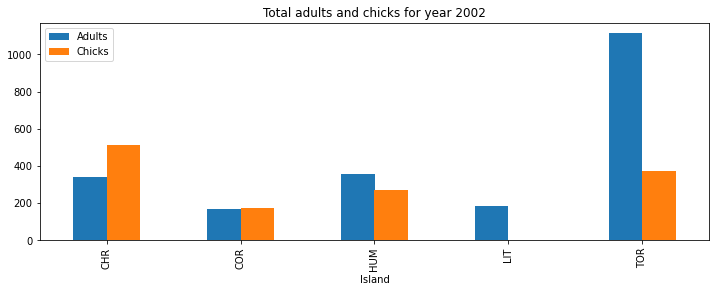

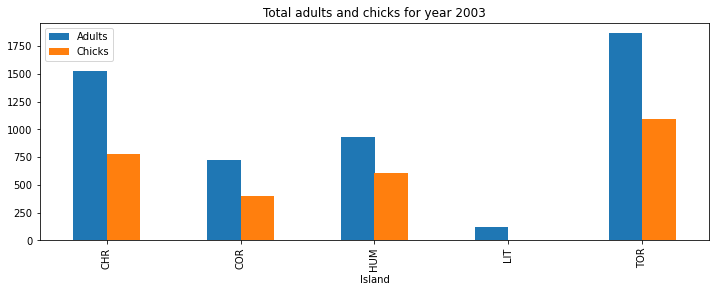

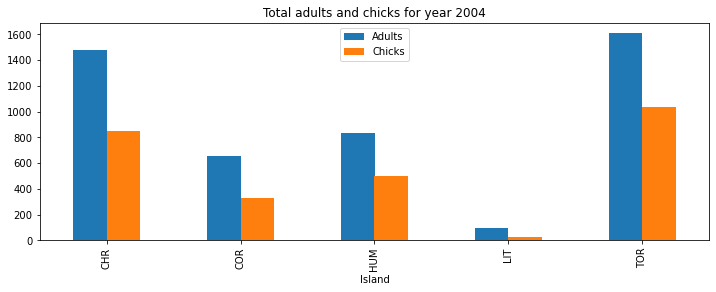

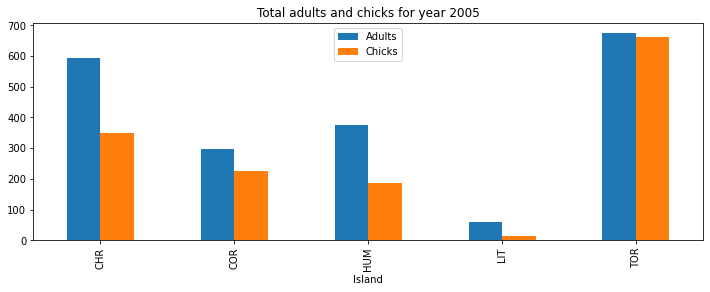

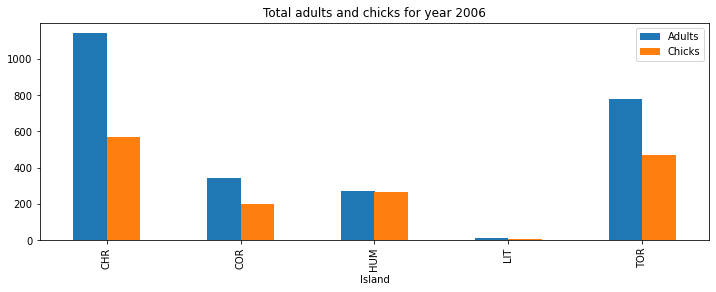

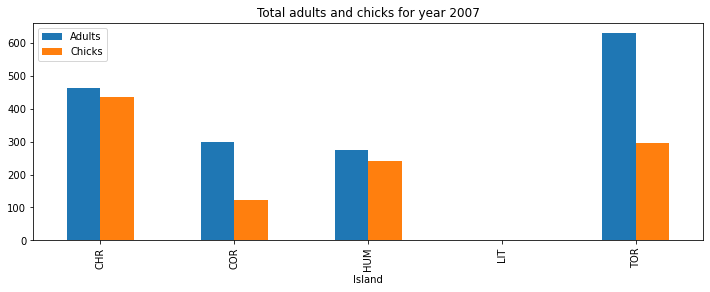

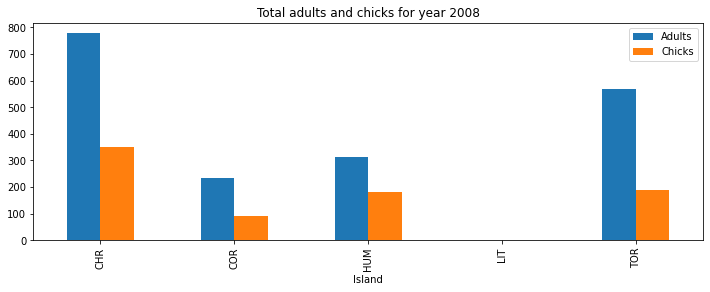

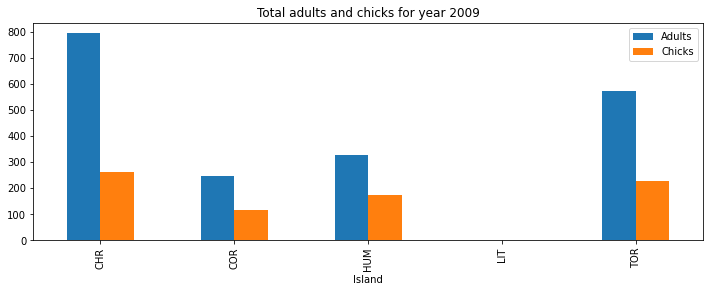

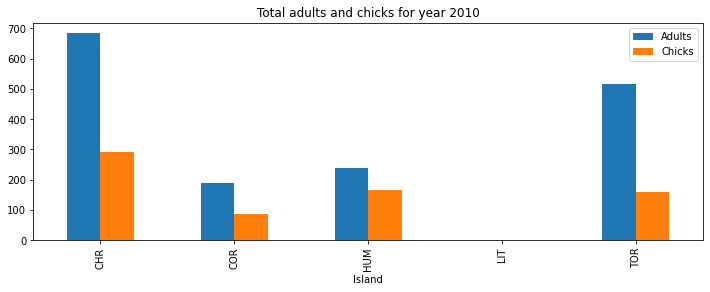

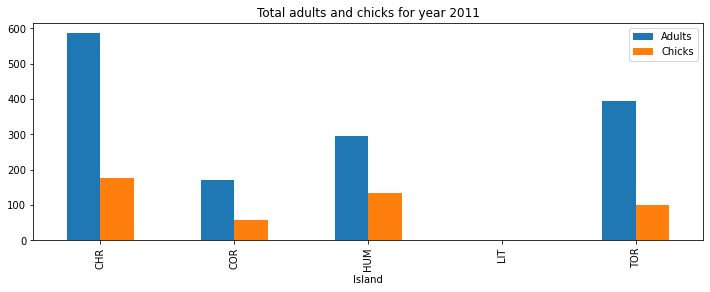

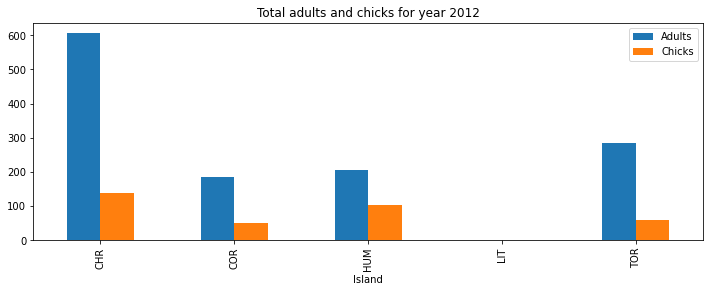

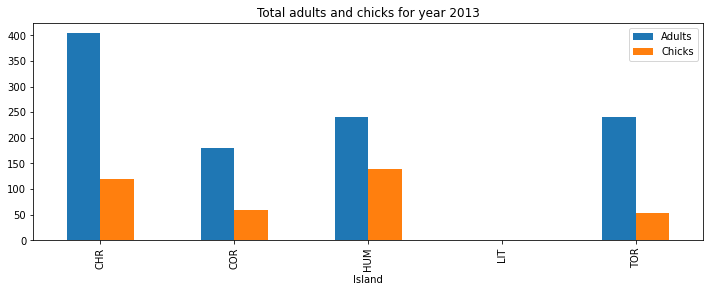

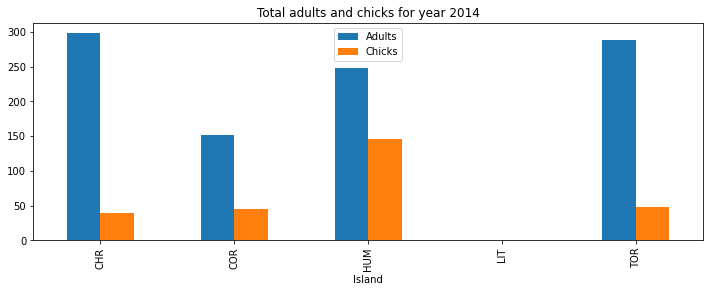

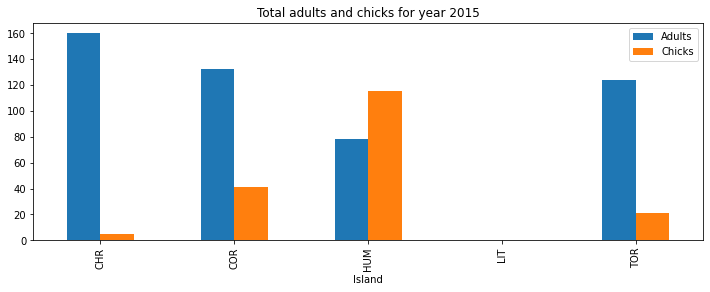

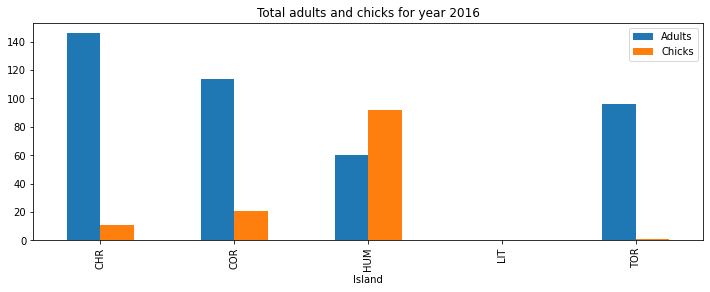

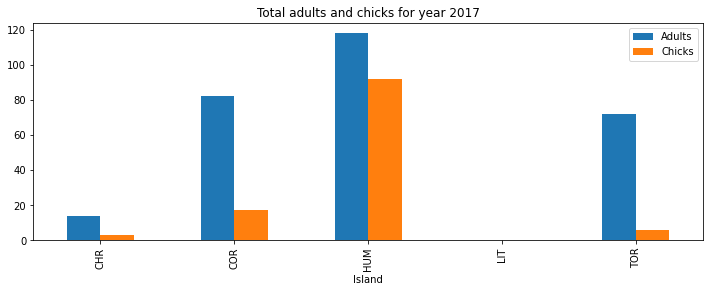

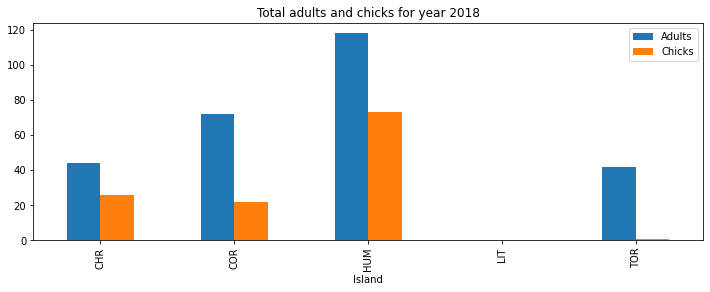

In [22]:
# Adults and chicks for each island per year
for year in range(1992, 2019):
    counts_per_island = total_counts_per_year_per_island[total_counts_per_year_per_island['Date'] == year]
    counts_per_island = counts_per_island.set_index('Island')
    counts_per_island[['Adults', 'Chicks']].plot.bar(figsize=(12,4))
    plt.title(f'Total adults and chicks for year {year}')
    

/Users/jazlynli/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


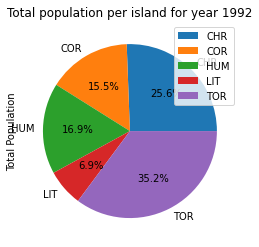

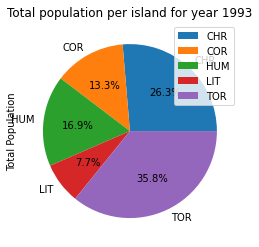

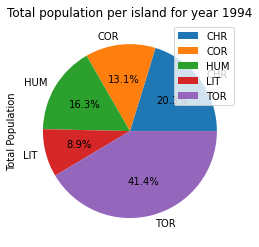

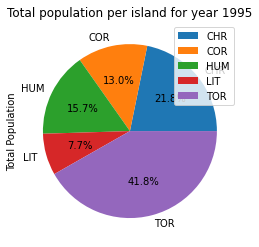

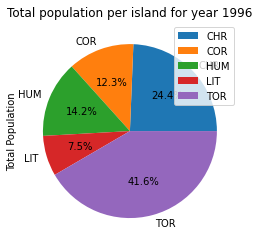

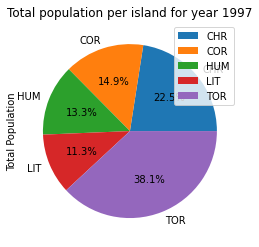

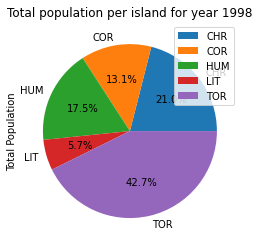

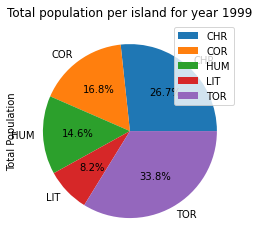

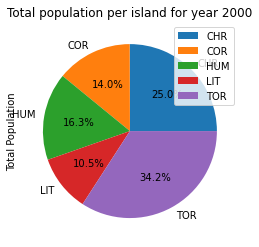

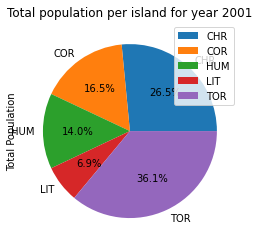

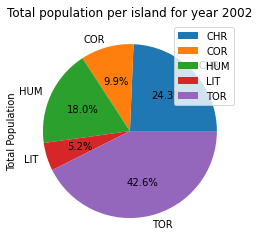

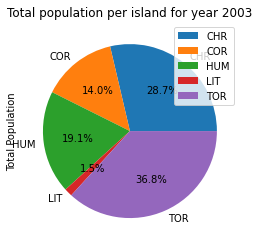

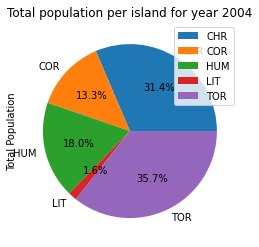

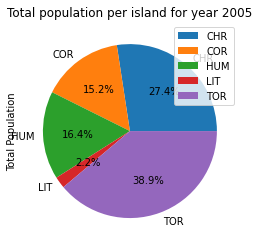

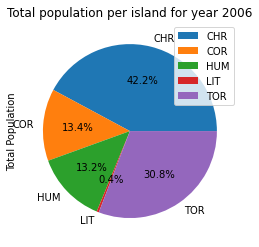

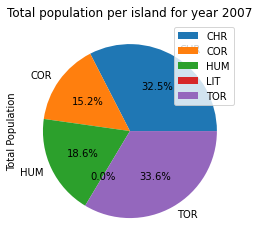

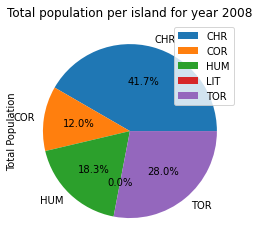

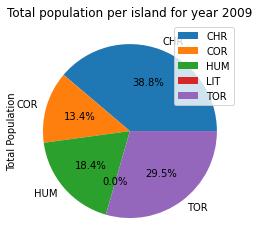

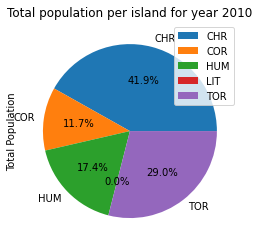

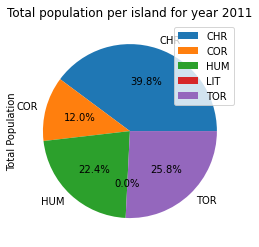

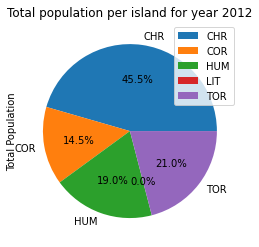

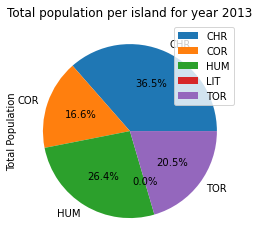

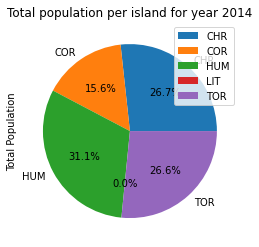

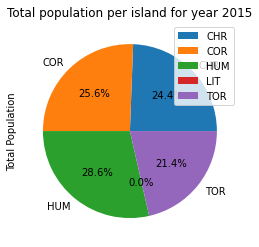

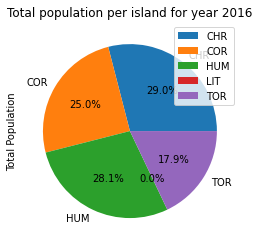

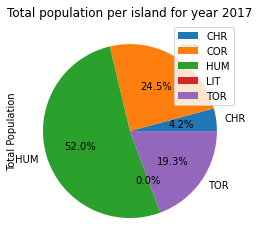

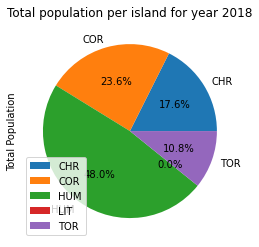

In [23]:
# pie chart of total population per island per year
for year in range(1992, 2019):
    counts_per_island = total_counts_per_year_per_island[total_counts_per_year_per_island['Date'] == year]
    counts_per_island = counts_per_island.set_index('Island')
    counts_per_island.plot.pie(y='Total Population', figsize=(15,4), autopct='%1.1f%%')
    plt.title(f'Total population per island for year {year}')